In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('C:/Users/Acer/Desktop/DATA/Nasa_Battery_Dataset.csv')

In [4]:
df


,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,SoH
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.000000
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.000000
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.000000
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.000000
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,0.713756
50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,0.713756
50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,0.713756
50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,0.713756


In [5]:
df.isnull().sum()

cycle                   0
ambient_temperature     0
datetime                0
capacity                0
voltage_measured        0
current_measured        0
temperature_measured    0
current_load            0
voltage_load            0
time                    0
SoH                     0
dtype: int64

In [6]:
df.describe()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,SoH
count,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,1.560345,3.515268,-1.806032,32.816991,1.362700,2.308406,1546.208924,0.840482
std,45.699687,0.0,0.182380,0.231778,0.610502,3.987515,1.313698,0.800300,906.640295,0.098239
min,1.000000,24.0,1.287453,2.455679,-2.029098,23.214802,-1.998400,0.000000,0.000000,0.693488
25%,50.000000,24.0,1.386229,3.399384,-2.013415,30.019392,1.998000,2.388000,768.563000,0.746694
50%,88.000000,24.0,1.538237,3.511664,-2.012312,32.828944,1.998200,2.533000,1537.031000,0.828574
75%,127.000000,24.0,1.746871,3.660903,-2.011052,35.920887,1.998200,2.690000,2305.984000,0.940955
max,168.000000,24.0,1.856487,4.222920,0.007496,41.450232,1.998400,4.238000,3690.234000,1.000000


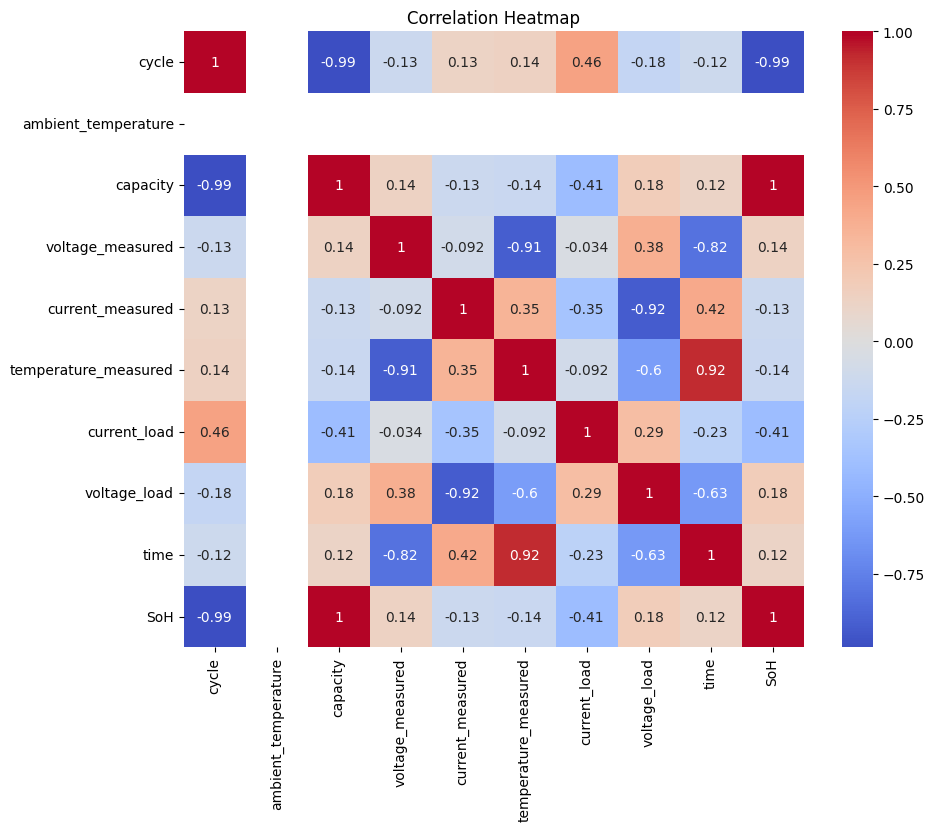

In [7]:
correlation_matrix = df.select_dtypes(include=["int64","float64"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df.drop(columns=['capacity'], inplace=True)
df.drop(columns=['cycle'], inplace=True)
df.drop(columns=['ambient_temperature'], inplace=True)

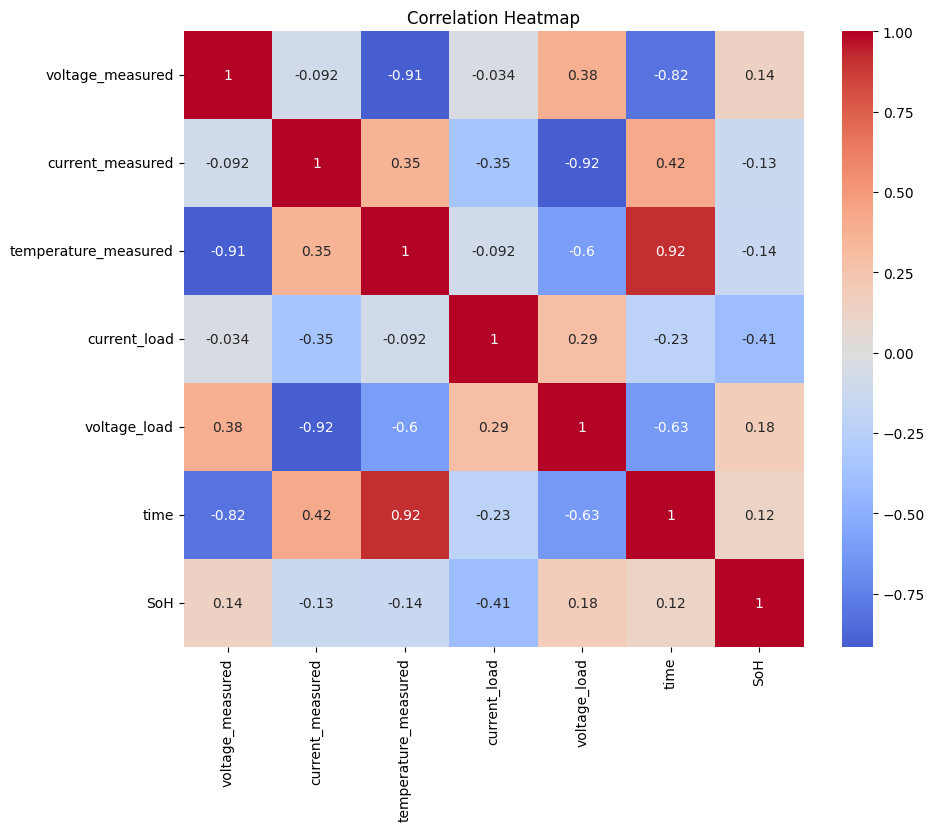

In [9]:
correlation_matrix = df.select_dtypes(include=["int64","float64"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [10]:
X = df.select_dtypes(include=["int64","float64"]).drop(columns=['SoH'])  # Features (excluding target)
y = df['SoH']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = rf_regressor.predict(X_test)

# RMSE hesapla
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 0.006542362392363022


In [13]:
y_pred = rf_regressor.predict(X_test)

# R-kare skoru hesapla
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.995575840831204


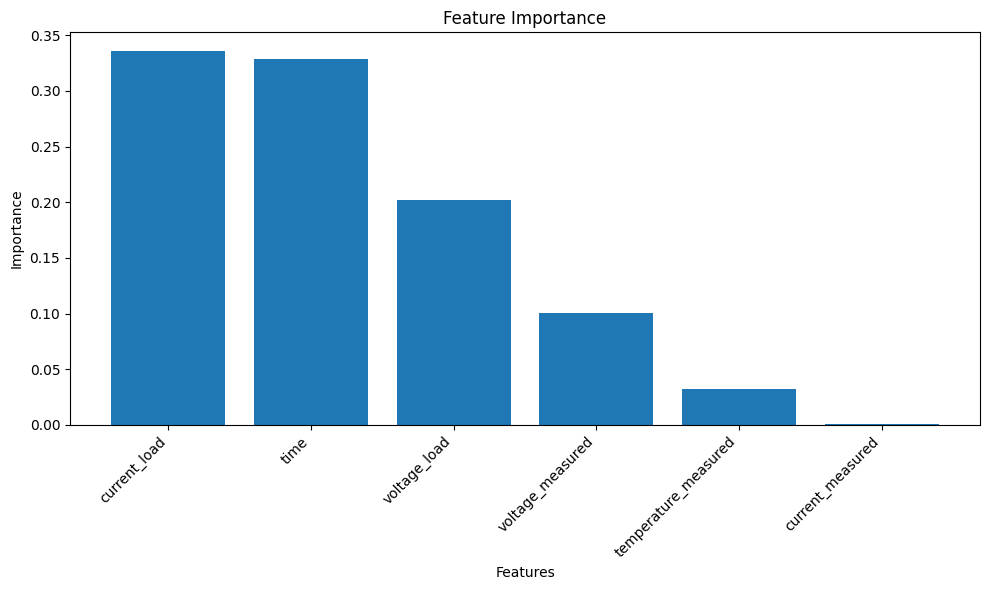

In [14]:
feature_importances = rf_regressor.feature_importances_

feature_names = X_train.columns
feature_importance_list = list(zip(feature_names, feature_importances))

# Önem sıralamalarını büyükten küçüğe sırala
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Grafik oluştur
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_list)), [importance for _, importance in feature_importance_list], align='center')
plt.xticks(range(len(feature_importance_list)), [feature for feature, _ in feature_importance_list], rotation=45, ha="right")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()

plt.show()
